# **Student Score Prediction**

In [456]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy import stats

### Data Loading

In [457]:
Data_Path = 'StudentPerformanceFactors.csv'

In [458]:
Data_Frame = pd.read_csv(Data_Path)
Data_Frame.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [459]:
Data_Frame.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [460]:
Data_Frame.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


### Data Cleaning

In [461]:
All_Factors = ['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity','Exam_Score']
Data_Frame = Data_Frame[All_Factors]

In [462]:
Data_Frame.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Sleep_Hours,0
Previous_Scores,0
Tutoring_Sessions,0
Physical_Activity,0
Exam_Score,0


In [463]:
Data_Frame.dropna(axis=0)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70
...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,68
6603,23,76,8,81,3,2,69
6604,20,90,6,65,3,2,68
6605,10,86,6,91,2,3,68


In [464]:
Data_Frame.duplicated().sum()

np.int64(1)

In [465]:
Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Hours_Studied      6607 non-null   int64
 1   Attendance         6607 non-null   int64
 2   Sleep_Hours        6607 non-null   int64
 3   Previous_Scores    6607 non-null   int64
 4   Tutoring_Sessions  6607 non-null   int64
 5   Physical_Activity  6607 non-null   int64
 6   Exam_Score         6607 non-null   int64
dtypes: int64(7)
memory usage: 361.4 KB


In [466]:
Data_Frame.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [467]:
# Removing outliers based on the Z-score method
z = np.abs((Data_Frame - Data_Frame.mean()) /Data_Frame.std())
threshold = 3
Data_Frame= Data_Frame[(z < threshold).all(axis=1)]

### Checking Correlation by Heatmap

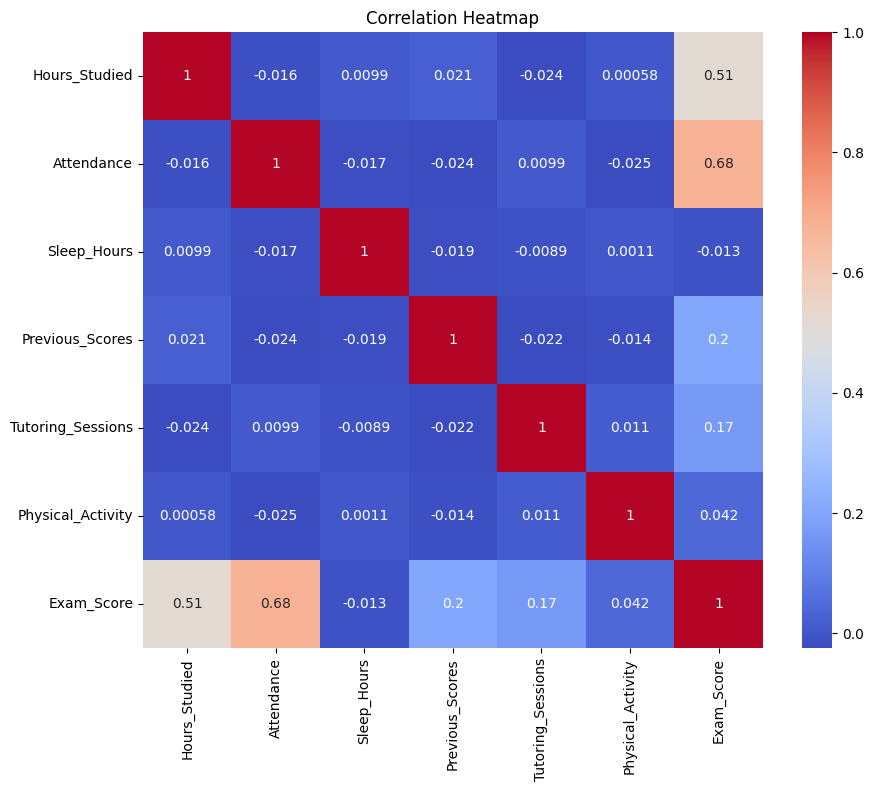

In [468]:
Check_Correlation = Data_Frame[All_Factors]
plt.figure(figsize=(10, 8))
sb.heatmap(Check_Correlation.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Scatter plots of features vs Exam Score

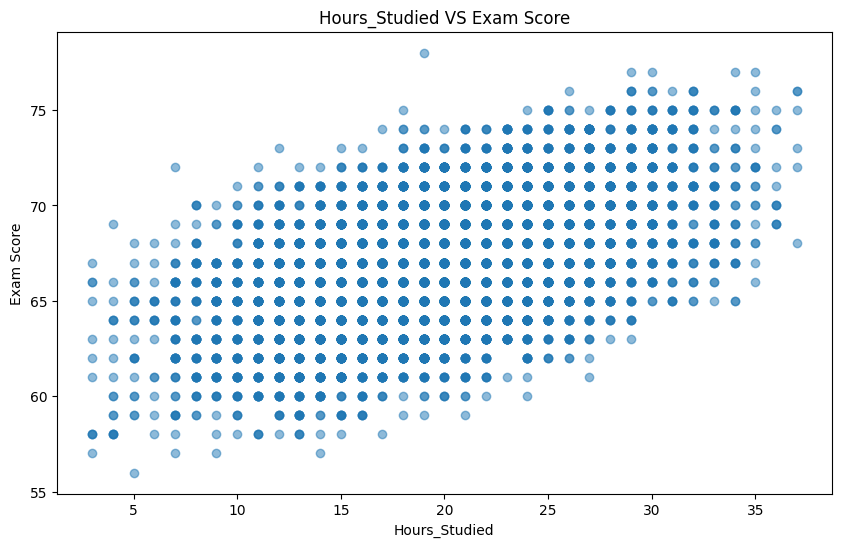

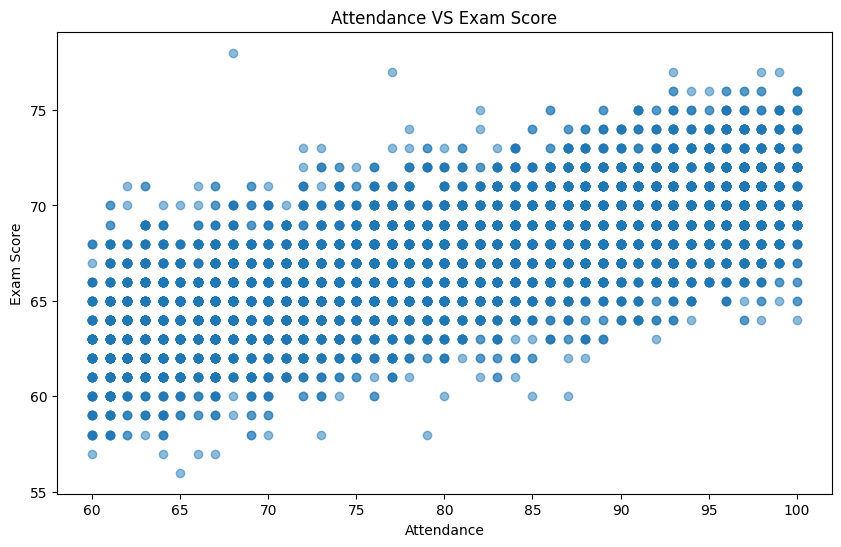

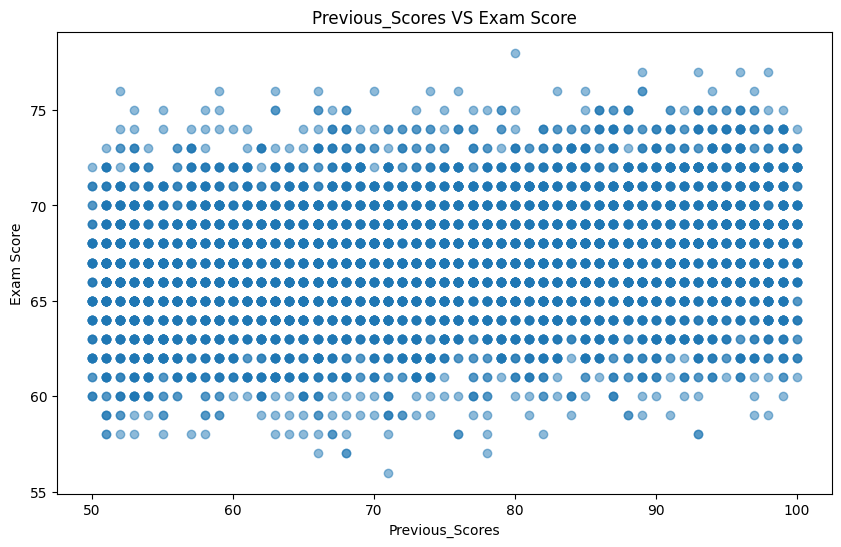

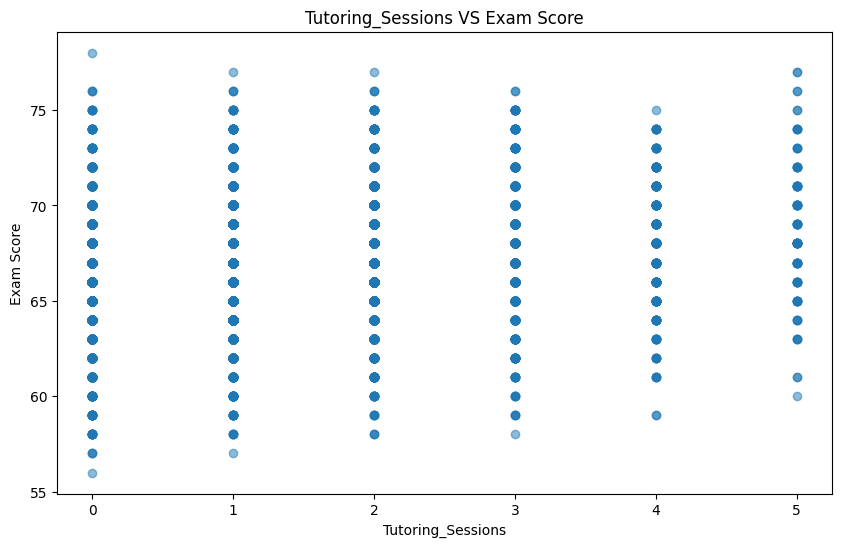

In [469]:
Exam_Score = Data_Frame['Exam_Score']
Training_Factors = ['Hours_Studied','Attendance','Previous_Scores','Tutoring_Sessions']
Input_Factors = Data_Frame[Training_Factors]
for col in Training_Factors:
    plt.figure(figsize=(10, 6))
    plt.scatter(Input_Factors[col], Exam_Score, alpha=0.5 )
    plt.xlabel(col)
    plt.ylabel('Exam Score')
    plt.title(f'{col} VS Exam Score')
    plt.show()

### Train-test split

In [470]:
x_train, x_test,y_train, y_test = train_test_split(Input_Factors,Exam_Score,test_size=0.2,random_state=1)

### **Linear Regression**

In [471]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

### Model Evaluation

In [472]:
print('Coefficients (m):' , model.coef_)
print('Intercept (b):' , model.intercept_)

Coefficients (m): [0.29379083 0.19846109 0.04873959 0.49584154]
Intercept (b): 40.91869121635741


In [473]:
y_pred = model.predict(x_test)
LMAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", LMAE)
LMSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", LMSE)
LR2 = r2_score(y_test, y_pred)
print("R² Score:",LR2 )

Mean Absolute Error (MAE): 1.1377324288363215
Mean Squared Error (MSE): 2.010870580395374
R² Score: 0.8264151145907103


### Predicted vs Actual plot (Linear Regression)

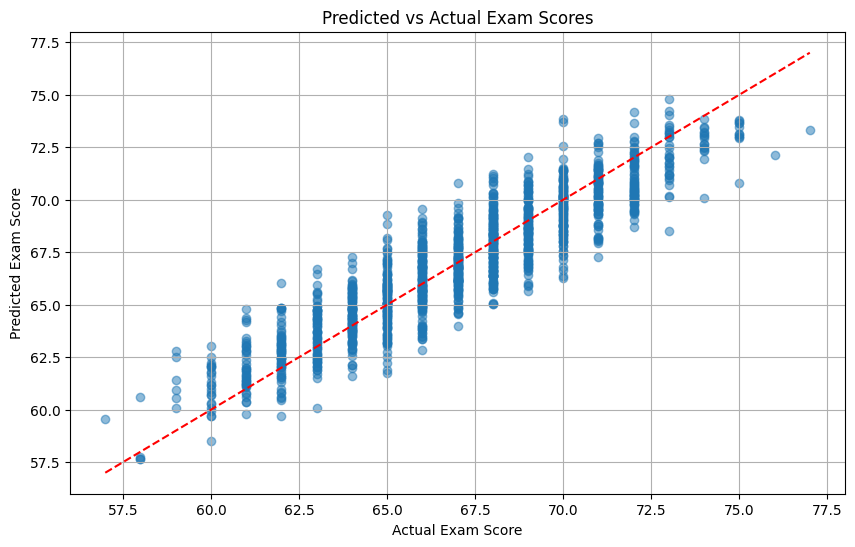

In [474]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test,y_pred,alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Predicted vs Actual Exam Scores')
plt.grid(True)
plt.show()

### **Polynomial Regression**

In [475]:
poly = PolynomialFeatures(degree=3,include_bias=False)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

In [476]:
model = LinearRegression()
model.fit(x_poly_train, y_train)
y_poly_pred = model.predict(x_poly_test)

### Prediction

In [477]:
result = x_test.copy()
result['Predicted_Exam_Score'] = y_poly_pred
result['Actual_Exam_Score'] = y_test.values
print(result.head(10))

      Hours_Studied  Attendance  Previous_Scores  Tutoring_Sessions  \
1710             27          99               63                  0   
6560             18          83               65                  3   
171              15          96               54                  3   
3347             30          86               85                  2   
1516             29          94               95                  2   
5370             13          61               85                  4   
1552             15          60               72                  2   
1578             16          90               54                  2   
1647             26          72               81                  0   
3666             24          92               64                  1   

      Predicted_Exam_Score  Actual_Exam_Score  
1710             71.937937                 73  
6560             67.236594                 68  
171              68.488999                 67  
3347             71.912522

### Evaluation

In [478]:

PMAE = mean_absolute_error(y_test, y_poly_pred)
print("Mean Absolute Error (MAE):", PMAE)
PMSE = mean_squared_error(y_test, y_poly_pred)
print("Mean Squared Error (MSE):", PMSE)
PR2 = r2_score(y_test, y_poly_pred)
print("R² Score:",PR2 )

Mean Absolute Error (MAE): 1.1373877284441298
Mean Squared Error (MSE): 2.012366477359596
R² Score: 0.8262859839019181


### Predicted vs Actual plot (Polynomial Regression)

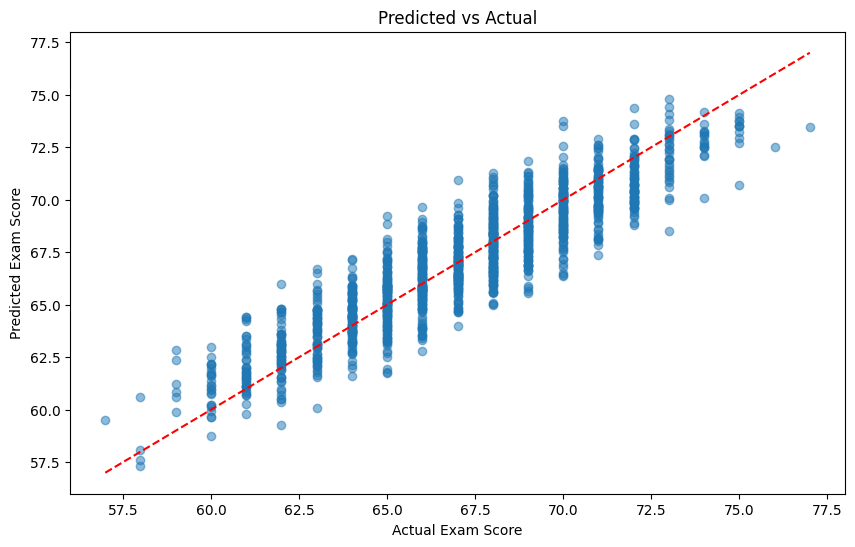

In [479]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_poly_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Predicted vs Actual')
plt.show()

### Comparison (Linear VS Polynomial Regression)

In [480]:
print("Linear Regression Performance:")
print("Mean Absolute Error:", LMAE)
print("Mean Squared Error:", LMSE)
print("R² Score:", LR2)


print("\nPolynomial Regression (Degree 3) Performance:")
print("Mean Absolute Error:", PMAE)
print("Mean Squared Error:", PMSE)
print("R² Score:", PR2)

Linear Regression Performance:
Mean Absolute Error: 1.1377324288363215
Mean Squared Error: 2.010870580395374
R² Score: 0.8264151145907103

Polynomial Regression (Degree 3) Performance:
Mean Absolute Error: 1.1373877284441298
Mean Squared Error: 2.012366477359596
R² Score: 0.8262859839019181


In [481]:
comparison_Data_Frame = pd.DataFrame({'Actual Exam Score': y_test, 'Predicted Exam Score (Linear Regression)': y_pred, 'Predicted Exam Score (Polynomial Regression)': y_poly_pred})
display(comparison_Data_Frame.head())

,Actual Exam Score,Predicted Exam Score (Linear Regression),Predicted Exam Score (Polynomial Regression)
1710,73,71.569286,71.937937
6560,68,67.334795,67.236594
171,67,68.497281,68.488999
3347,72,71.934618,71.912522
1516,70,73.715912,73.504410
